In [3]:
import tensorflow as tf
import pandas as pd

In [11]:
import warnings 
warnings.filterwarnings("ignore") 
from ml_class_utils import *

Shape: (891, 12)
-----------------
PassengerId --> Type:num | Nas: 0(0%) | Min-Max: (1)-(891) | Possible PK
Survived --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass --> Type:cat | Nas: 0(0%) | Categories: 3
Name --> Type:cat | Nas: 0(0%) | Categories: 891 | Possible PK
Sex --> Type:cat | Nas: 0(0%) | Categories: 2
Age --> Type:num | Nas: 177(19%) | Min-Max: (0)-(80)
SibSp --> Type:cat | Nas: 0(0%) | Categories: 7
Parch --> Type:cat | Nas: 0(0%) | Categories: 7
Ticket --> Type:cat | Nas: 0(0%) | Categories: 681
Fare --> Type:num | Nas: 0(0%) | Min-Max: (0)-(512)
Cabin --> Type:cat | Nas: 687(77%) | Categories: 147
Embarked --> Type:cat | Nas: 2(0%) | Categories: 3


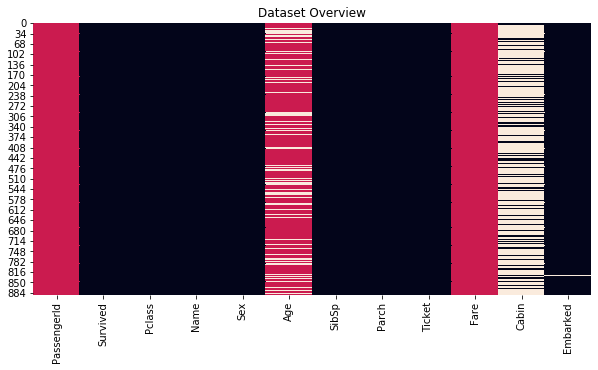

 Categerocial   Numerical   NaN 


In [12]:
dtf = pd.read_csv("data_titanic.csv")
dtf.head()
dtf_overview(dtf,max_cat=20,figsize=(10,5))

In [21]:

dtf = dtf.rename(columns={"Survived":"Y"})

In [23]:
dtf

,y,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 1. Data analysis

####### Group variables by info
- Who: Sex,Age,Embarked (Which port C=Cherbourg,Q=Queenstown,S=Southampton)
- Wealth: Pclass,Ticket,Fare
- Where Cabin
- How many: Sibp (With Siblings/Spouse), Parch (With Parent/Children)


In [28]:
features = []

### Target Variable

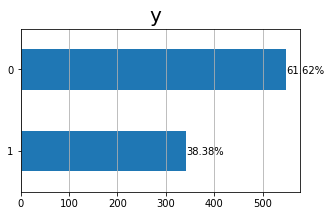

In [30]:
freqdist_plot(dtf,"y",figsize=(5,3))
# 0 represents those who did'nt survive
# 1 represents those who did survive

--- WARNING: Factorizing 891 labels of Name ---
--- WARNING: Factorizing 2 labels of Sex ---
--- WARNING: Factorizing 681 labels of Ticket ---
--- WARNING: Factorizing 147 labels of Cabin ---
--- WARNING: Factorizing 3 labels of Embarked ---


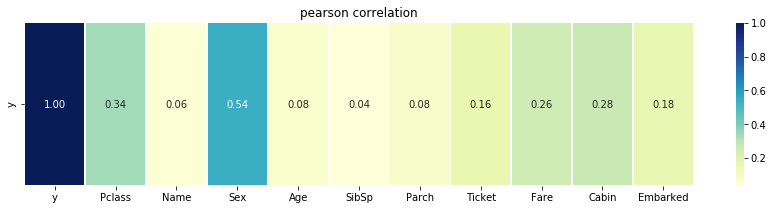

In [32]:
corr = corr_matrix(dtf,method="pearson",negative=False,
                  lst_filters=["y"],figsize=(15,3))

--- got error ---
rename() got an unexpected keyword argument 'columns'


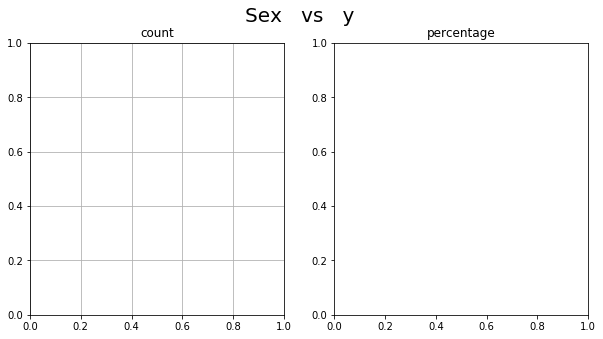

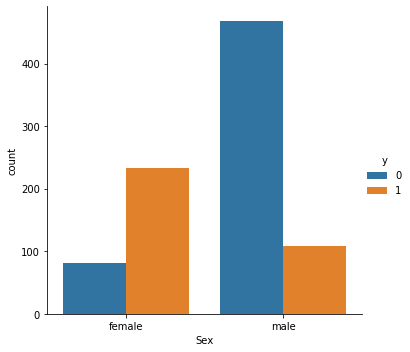

In [33]:
bivariate_plot(dtf,x="Sex",y="y", figsize=(10,5))

In [34]:
coeff, p = test_corr(dtf,x="Sex",y="y")

Cramer Correlation: 0.54 Significant (p-value: 0.0)


In [35]:
features.append("Sex")

--- got error ---
rename() got an unexpected keyword argument 'columns'


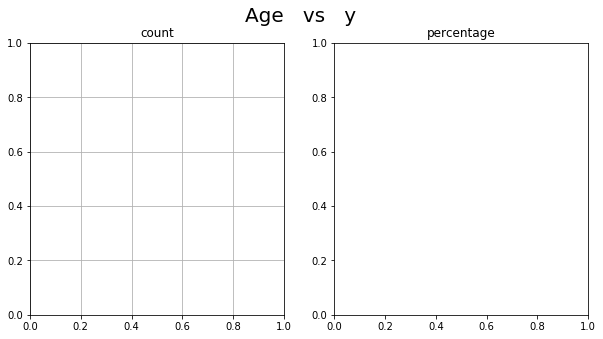

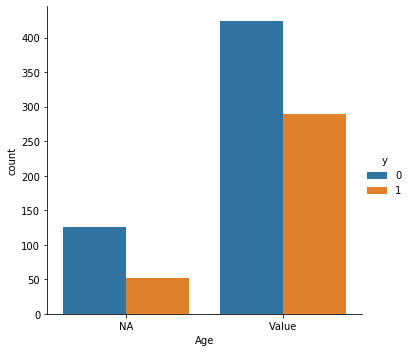

In [39]:
nan_analysis(dtf,na_x="Age",y="y", max_cat=20,figsize=(10,5))

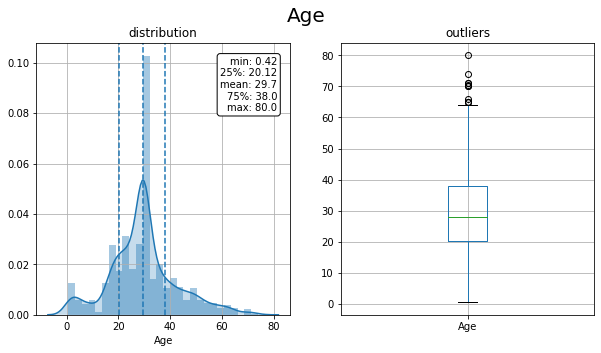

In [41]:
freqdist_plot(dtf,"Age",figsize=(10,5))

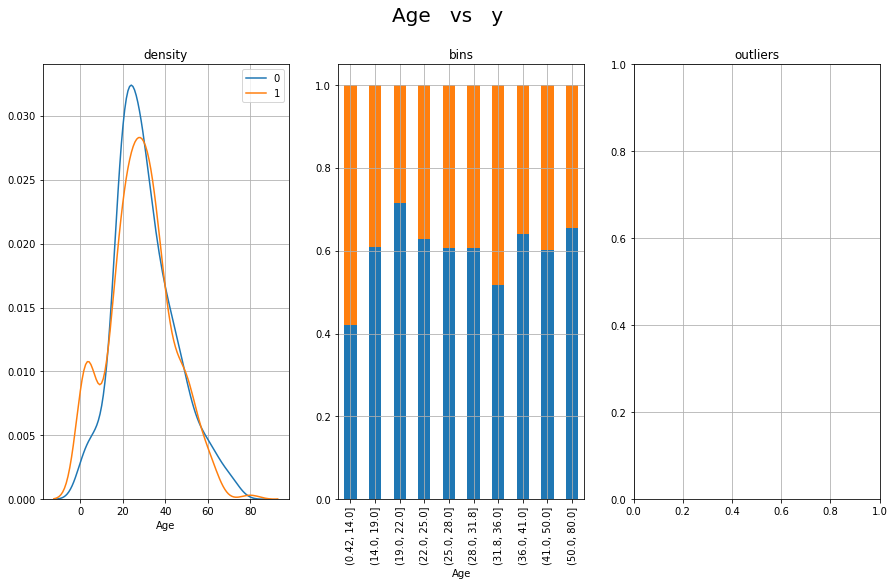

In [44]:
bivariate_plot(dtf,x="Age",y="y", figsize=(15,8))

In [45]:
features.append("Age")

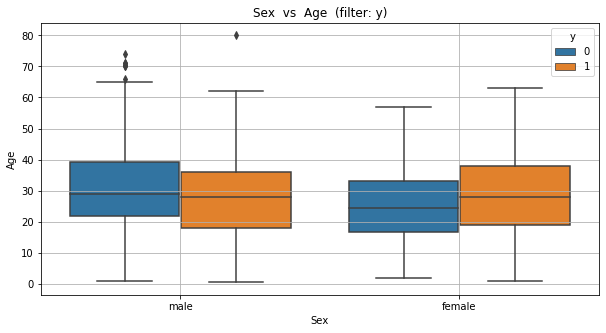

In [47]:
cross_distributions(dtf, x1="Sex",x2="Age",y="y",figsize=(10,5))

In [48]:
coeff, p = test_corr(dtf,x="Embarked",y="y")

Cramer Correlation: 0.166 Significant (p-value: 0.0)


In [49]:
features.append("Embarked")

--- got error ---
rename() got an unexpected keyword argument 'columns'


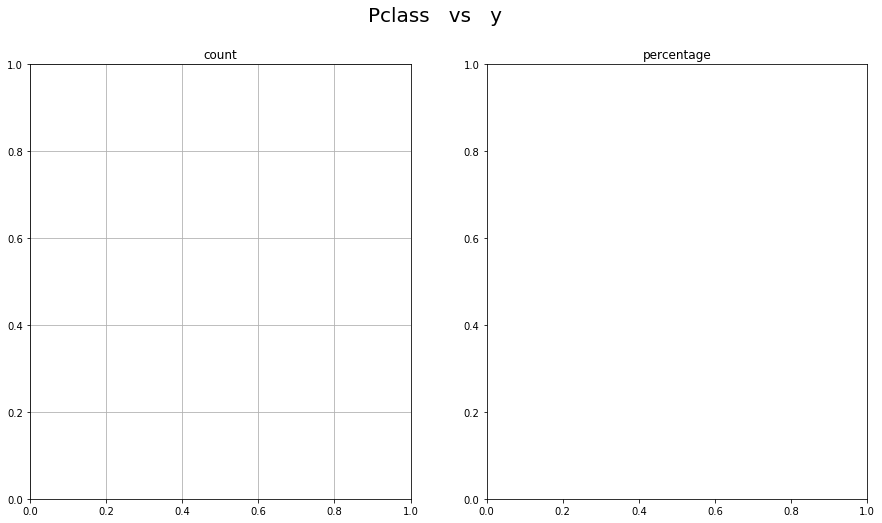

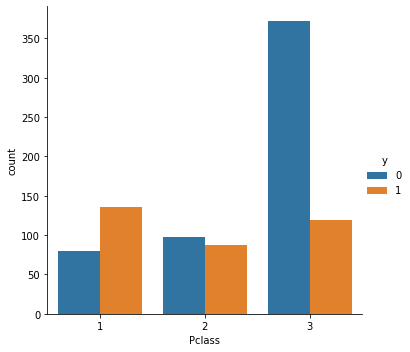

In [50]:
bivariate_plot(dtf,x="Pclass",y="y", figsize=(15,8))

In [52]:
coeff, p = test_corr(dtf,x="Pclass",y="y")

Cramer Correlation: 0.337 Significant (p-value: 0.0)


In [53]:
features.append("Pclass")

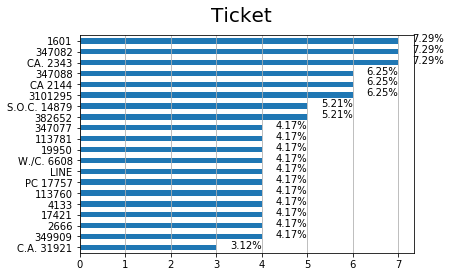

In [54]:
freqdist_plot(dtf,"Ticket",figsize=(6,4))

In [55]:
coeff, p = test_corr(dtf,x="Ticket",y="y")

Cramer Correlation: 0.311 Significant (p-value: 0.012)


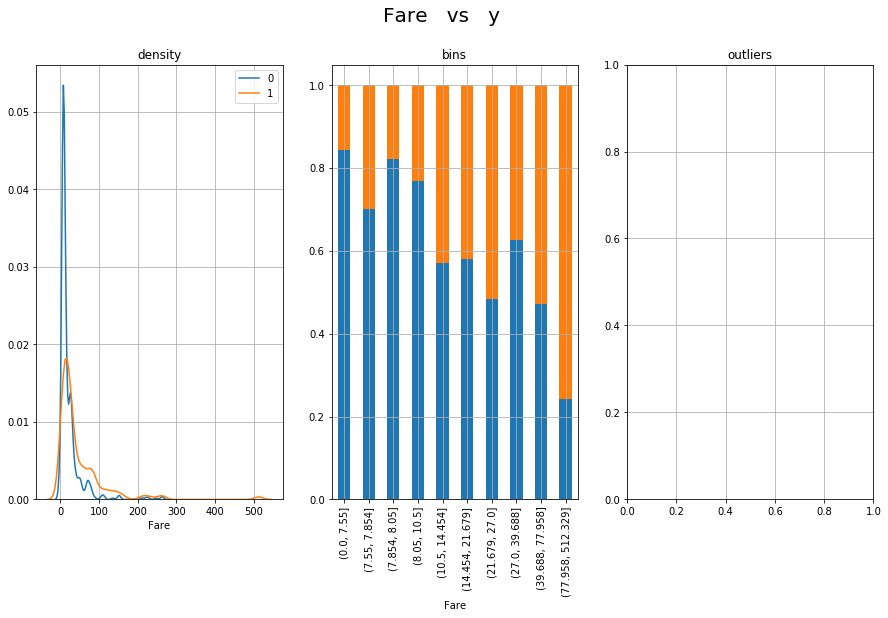

In [56]:
bivariate_plot(dtf,x="Fare",y="y", figsize=(15,8))

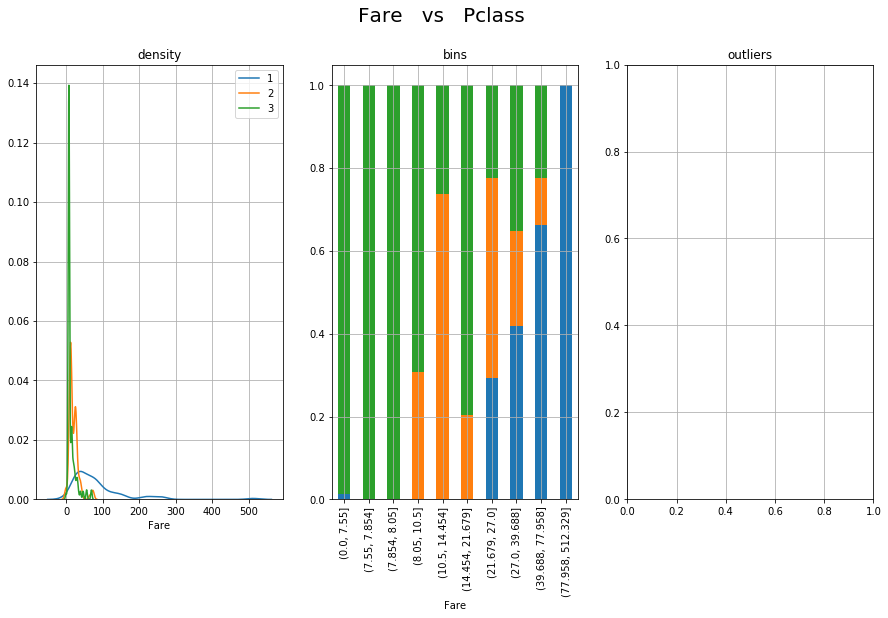

In [57]:
bivariate_plot(dtf,x="Fare",y="y", figsize=(15,8))

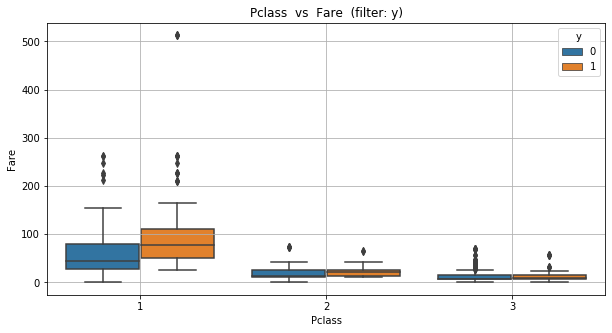

In [58]:
cross_distributions(dtf, x1="Pclass",x2="Fare",y="y",figsize=(10,5))

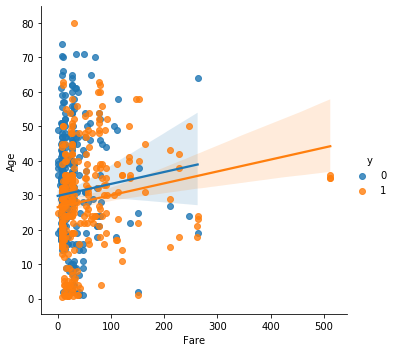

In [60]:
cross_distributions(dtf, x1="Fare",x2="Age",y="y",figsize=(10,5))

In [61]:
features.append("Fare")

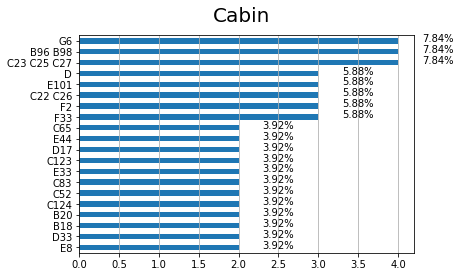

In [62]:
freqdist_plot(dtf,"Cabin",figsize=(6,4))

--- got error ---
rename() got an unexpected keyword argument 'columns'


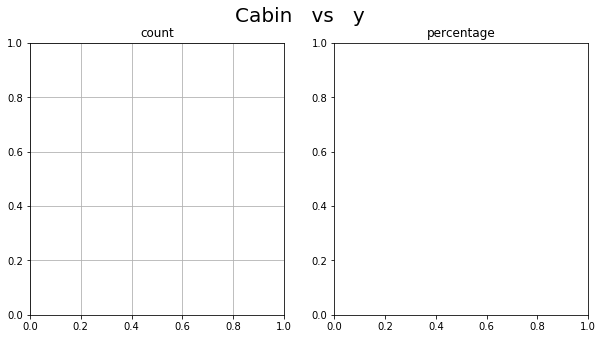

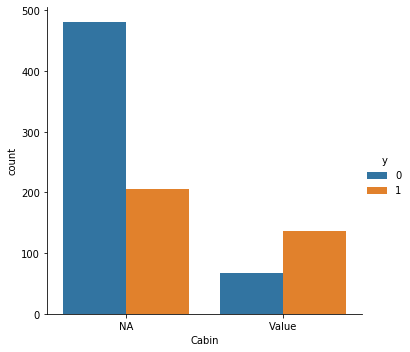

In [63]:
nan_analysis(dtf,na_x="Cabin",y="y", max_cat=20,figsize=(10,5))

In [64]:
dtf["Cabin_section"] = dtf["Cabin"].apply(lambda x: str(x)[0])

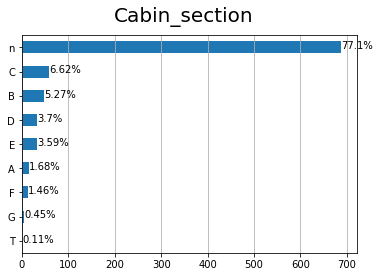

In [65]:
freqdist_plot(dtf,"Cabin_section",figsize=(6,4))

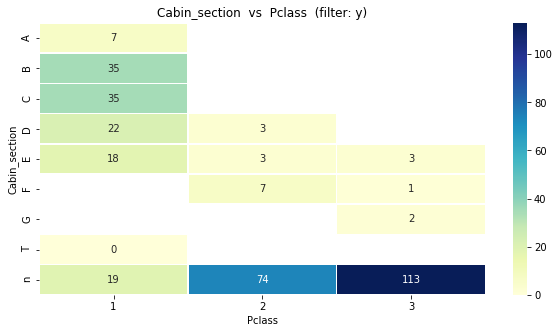

In [66]:
cross_distributions(dtf, x1="Cabin_section",x2="Pclass",y="y",figsize=(10,5))

In [67]:
coeff, p = test_corr(dtf,x="Cabin_section",y="y")

Cramer Correlation: 0.32 Significant (p-value: 0.0)


In [68]:
features.append("Cabin_section")

--- got error ---
rename() got an unexpected keyword argument 'columns'


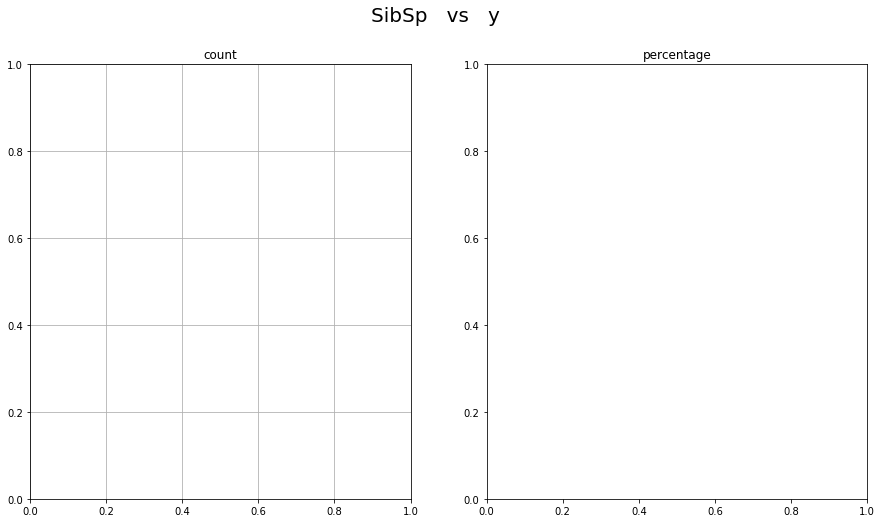

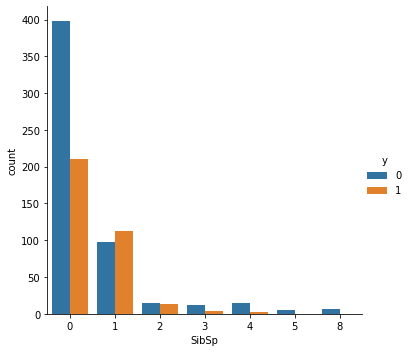

In [70]:
###### How many? SibSp, ParCh
bivariate_plot(dtf,x="SibSp",y="y", figsize=(15,8))

In [71]:
coeff, p = test_corr(dtf,x="SibSp",y="y")

Cramer Correlation: 0.187 Significant (p-value: 0.0)


In [72]:
features.append("SibSp")

--- got error ---
rename() got an unexpected keyword argument 'columns'


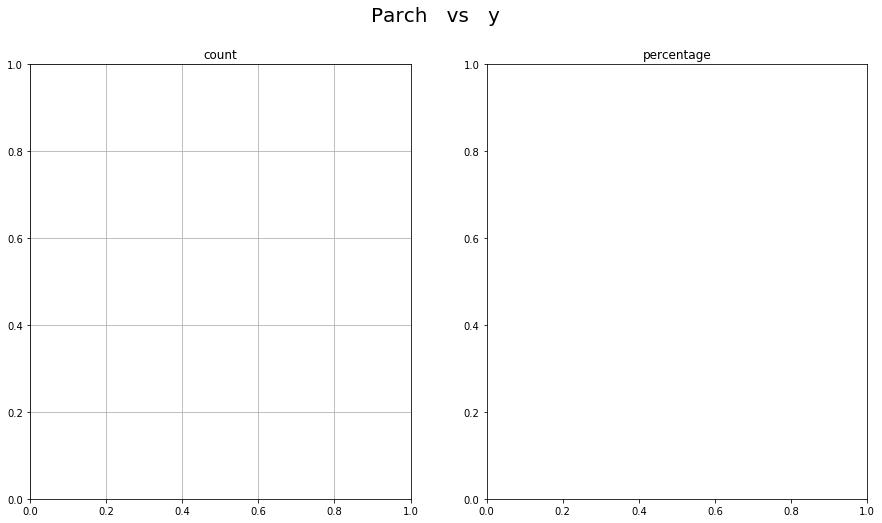

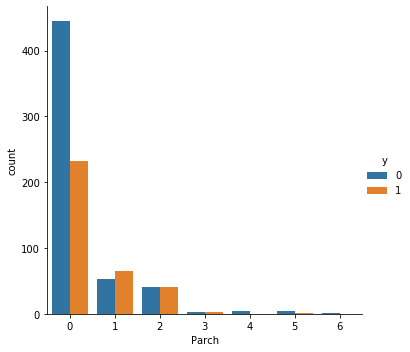

In [73]:
bivariate_plot(dtf,x="Parch",y="y", figsize=(15,8))

In [74]:
coeff, p = test_corr(dtf,x="Parch",y="y")

Cramer Correlation: 0.157 Significant (p-value: 0.0)


In [75]:
features.append("Parch")

In [76]:
features

['Sex', 'Age', 'Embarked', 'Pclass', 'Fare', 'Cabin_section', 'SibSp', 'Parch']

In [79]:
# Summary
dtf = dtf[features+["y"]]
dtf.head()

,Sex,Age,Embarked,Pclass,Fare,Cabin_section,SibSp,Parch,y
PassengerId,,,,,,,,,
1,male,22.0,S,3,7.2500,n,1,0,0
2,female,38.0,C,1,71.2833,C,1,0,1
3,female,26.0,S,3,7.9250,n,0,0,1
4,female,35.0,S,1,53.1000,C,1,0,1
5,male,35.0,S,3,8.0500,n,0,0,0
